In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb

In [9]:


# Load the training and test datasets
test_data = pd.read_csv('/content/cleaned_data_test.csv')
train_data = pd.read_csv('/content/cleaned_data_train.csv')

In [10]:


# Convert 'Cancer' column to numeric
train_data['Cancer'] = train_data['Cancer'].astype(int)
test_data['Cancer'] = test_data['Cancer'].astype(int)

# Separate features (FPKM) and target (Cancer)
X_train = train_data.drop(columns=['Cancer', 'Sample'])
y_train = train_data['Cancer']

X_test = test_data.drop(columns=['Cancer', 'Sample'])
y_test = test_data['Cancer']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:


# XGBoost Model
print("\n### XGBoost Model ###")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)











### XGBoost Model ###


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [12]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

In [13]:

# Evaluate XGBoost
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.9649122807017544
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.98      0.98      0.98        50

    accuracy                           0.96        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.96      0.96      0.96        57



In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

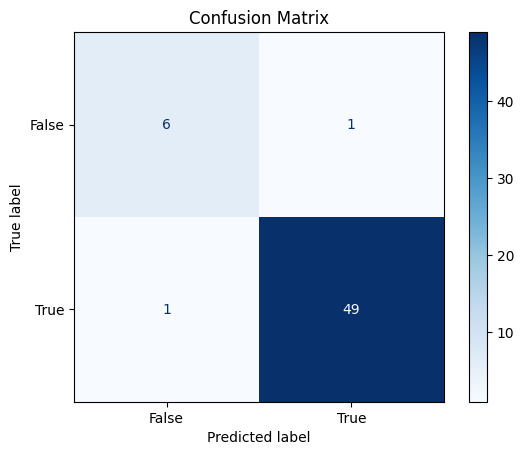

In [15]:

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [16]:
# Feature Importance
feature_importances = xgb_model.feature_importances_
feature_importances = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

In [17]:
# Top 20 most important features
print("\nTop 20 Features by Importance:")
print(feature_importances.head(20))








Top 20 Features by Importance:
ENSG00000155657    0.165585
ENSG00000168172    0.095247
ENSG00000101132    0.070856
ENSG00000156052    0.065453
ENSG00000170323    0.055301
ENSG00000168685    0.046225
ENSG00000229164    0.044644
ENSG00000165949    0.043906
ENSG00000243491    0.038727
ENSG00000111725    0.026343
ENSG00000006652    0.021056
ENSG00000175445    0.019256
ENSG00000115590    0.017861
ENSG00000171817    0.017651
ENSG00000152583    0.017639
ENSG00000247675    0.015102
ENSG00000189045    0.013401
ENSG00000196547    0.012013
ENSG00000132485    0.010045
ENSG00000069535    0.009861
dtype: float32


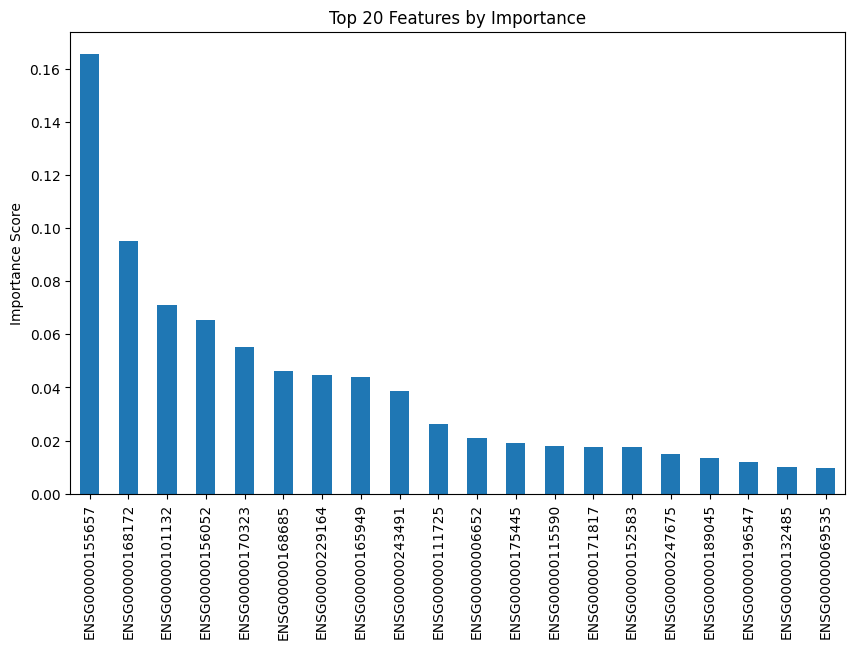

In [18]:
# Plot Top 20 Features
feature_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Features by Importance')
plt.ylabel('Importance Score')
plt.show()

In [19]:
# Bottom 20 least important features
print("\nBottom 20 Features by Importance:")
print(feature_importances.tail(20))


Bottom 20 Features by Importance:
ENSG00000201070    0.0
ENSG00000201071    0.0
ENSG00000201074    0.0
ENSG00000201075    0.0
ENSG00000201076    0.0
ENSG00000201077    0.0
ENSG00000201080    0.0
ENSG00000201109    0.0
ENSG00000201084    0.0
ENSG00000201085    0.0
ENSG00000201086    0.0
ENSG00000201088    0.0
ENSG00000201095    0.0
ENSG00000201096    0.0
ENSG00000201097    0.0
ENSG00000201098    0.0
ENSG00000201102    0.0
ENSG00000201104    0.0
ENSG00000201105    0.0
ENSG00000273493    0.0
dtype: float32


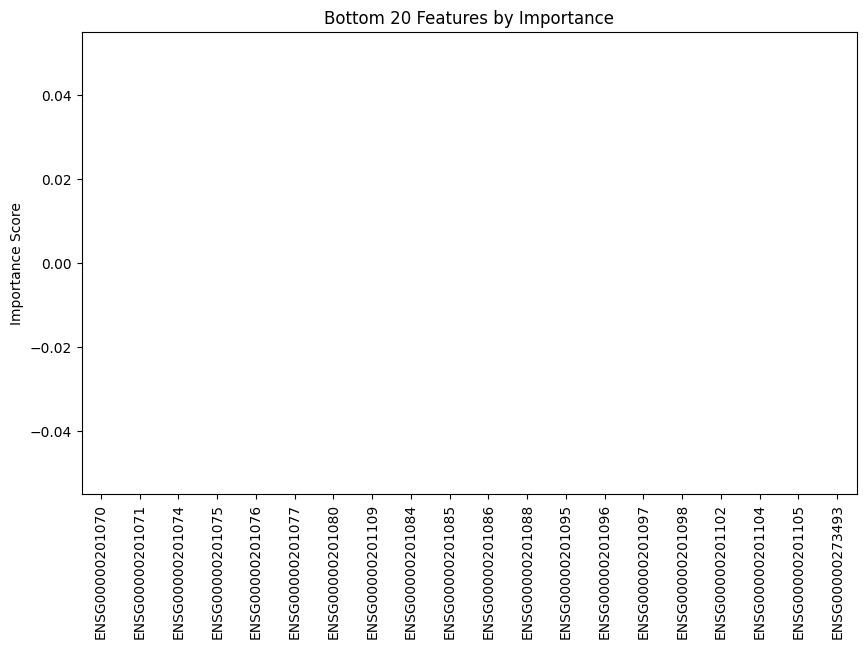

In [20]:

# Plot Bottom 20 Features
feature_importances.tail(20).plot(kind='bar', figsize=(10, 6))
plt.title('Bottom 20 Features by Importance')
plt.ylabel('Importance Score')
plt.show()


In [21]:
# Interpretation
if feature_importances.max() > 0:
    print("\nGenes that increase the probability of cancer have higher importance scores.")
else:
    print("\nGenes with negative importance scores decrease the probability of cancer.")


Genes that increase the probability of cancer have higher importance scores.
